In [1]:
#Importar librerias.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#Cargar datos. 
df=pd.read_csv("/home/jovyan/Tesis/TethaF.csv")
df

,h,Tilt angle β,δ (declinación),cos(θ) formula 1,cos(θ) formula 2,A,Latitude φ,cos(δ),sin(δ),cos(β),sin(β),cos(ω),sin(ω),cos(y),sin(y),cos(φ),sin(φ)
0,1,0,-23.011637,0.368896,0.735362,0,19.32361,0.920425,-0.390918,1,0,0.995562,0.094108,1,0,0.943665,0.330903
1,2,0,-22.930544,0.367666,0.736312,0,19.32361,0.920978,-0.389615,1,0,0.995562,0.094108,1,0,0.943665,0.330903
2,3,0,-22.842656,0.366332,0.737340,0,19.32361,0.921574,-0.388202,1,0,0.995562,0.094108,1,0,0.943665,0.330903
3,4,0,-22.747999,0.364895,0.738446,0,19.32361,0.922214,-0.386679,1,0,0.995562,0.094108,1,0,0.943665,0.330903
4,5,0,-22.646602,0.363354,0.739628,0,19.32361,0.922897,-0.385046,1,0,0.995562,0.094108,1,0,0.943665,0.330903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,360,0,-23.354300,0.374084,0.731331,0,19.32361,0.918071,-0.396416,1,0,0.995562,0.094108,1,0,0.943665,0.330903
360,361,0,-23.314410,0.373480,0.731802,0,19.32361,0.918347,-0.395776,1,0,0.995562,0.094108,1,0,0.943665,0.330903
361,362,0,-23.267611,0.372772,0.732353,0,19.32361,0.918670,-0.395026,1,0,0.995562,0.094108,1,0,0.943665,0.330903
362,363,0,-23.213917,0.371960,0.732986,0,19.32361,0.919040,-0.394165,1,0,0.995562,0.094108,1,0,0.943665,0.330903


In [3]:
#Convertir la columna "h" en índice.
df.index=df.h
df=df.drop('h',axis=1)

In [4]:
#Seleccionar únicamente la columna cos (0) formula 2. 
column=df["cos(θ) formula 2"]

In [5]:
#Generar un nuevo df con las columnas que nos interesan. 
df2= {"Días": np.arange(1,365),"cos":column}
df3 = pd.DataFrame(df2)

In [6]:
#Generar el df definitivo con el índice de 1 a 365 y con la columna seleccionada.
df3.index=df3.Días
df3=df3.drop('Días',axis=1)

Cálculo de la producción eléctrica. 

In [7]:
#Generar slices para cada mes, considerando la numeración seleccionada en el índice. 
df_ene=df3.loc[df3.index<32]
df_feb=df3.loc[(df3.index>=32) & (df3.index<=59)]
df_mar=df3.loc[(df3.index>=60) & (df3.index<=90)]
df_abr=df3.loc[(df3.index>=91) & (df3.index<=120)]
df_may=df3.loc[(df3.index>=121) & (df3.index<=151)]
df_jun=df3.loc[(df3.index>=152) & (df3.index<=181)]
df_jul=df3.loc[(df3.index>=182) & (df3.index<=212)]
df_ago=df3.loc[(df3.index>=213) & (df3.index<=243)]
df_sep=df3.loc[(df3.index>=244) & (df3.index<=273)]
df_oct=df3.loc[(df3.index>=274) & (df3.index<=304)]
df_nov=df3.loc[(df3.index>=305) & (df3.index<=334)]
df_dic=df3.loc[(df3.index>=335) & (df3.index<=365)]

In [8]:
#Obtener el promedio por mes de los valores presentes en cada slice.
df_enef = df_ene["cos"].mean()
df_febf = df_feb["cos"].mean()
df_marf = df_mar["cos"].mean()
df_abrf = df_abr["cos"].mean()
df_mayf = df_may["cos"].mean()
df_junf = df_jun["cos"].mean()
df_julf = df_jul["cos"].mean()
df_agof = df_ago["cos"].mean()
df_sepf = df_sep["cos"].mean()
df_octf = df_oct["cos"].mean()
df_novf = df_nov["cos"].mean()
df_dicf = df_dic["cos"].mean()

In [9]:
# Datos de la irradiancia y proyecciones para el gráfico de producción eléctrica. 
area = 6622.26  # Área en m².
ef = 0.233  # Eficiencia del panel.
qene = [4031.41, 4896.74, 5765.40]  # Datos en W/m²
qfeb = [5048.50, 5901.70, 6636.49]  
qmar = [5577.14, 6526.70, 7173.30]  
qabr = [5586.60, 6320.90, 7218.00]  
qmay = [5309.90, 6234.50, 6933.12]  
qjun = [4358.55, 5712.90, 6980.62] 
qjul = [4368.49, 5455.83, 6475.32]  
qago = [4445.10, 5413.00, 6175.70]  
qsep = [3639.54, 4605.70, 5523.45]  
qoct = [3775.40, 4922.95, 5918.26]  
qnov = [3873.32, 5103.45, 5732.40]  
qdic = [4001.19, 4816.86, 5745.57]  

In [10]:
# Cálculo de la energía generada para cada mes.
Qsene = [(ii * ef * area) / 1000000 for ii in qene]
Qsfeb = [(aa * ef * area) / 1000000 for aa in qfeb]
Qsmar = [(cc * ef * area) / 1000000 for cc in qmar]
Qsabr = [(ee * ef * area) / 1000000 for ee in qabr]
Qsmay = [(gg * ef * area) / 1000000 for gg in qmay]
Qsjun = [(jj * ef * area) / 1000000 for jj in qjun]
Qsjul = [(mm * ef * area) / 1000000 for mm in qjul]
Qsago = [(oo * ef * area) / 1000000 for oo in qago]
Qssep = [(qq * ef * area) / 1000000 for qq in qsep]
Qsoct = [(rr * ef * area) / 1000000 for rr in qoct]
Qsnov = [(tt * ef * area) / 1000000 for tt in qnov]
Qsdic = [(vv * ef * area) / 1000000 for vv in qdic]

In [11]:
#Separar en una variable los Q1, en otra los Q2 y en otra los Q3.
Q1 = np.array([Qsene[0], Qsfeb[0], Qsmar[0], Qsabr[0], Qsmay[0], Qsjun[0], Qsjul[0], Qsago[0], Qssep[0], Qsoct[0], Qsnov[0], Qsdic[0]])
Q2 = np.array([Qsene[1], Qsfeb[1], Qsmar[1], Qsabr[1], Qsmay[1], Qsjun[1], Qsjul[1], Qsago[1], Qssep[1], Qsoct[1], Qsnov[1], Qsdic[1]])
Q3 = np.array([Qsene[2], Qsfeb[2], Qsmar[2], Qsabr[2], Qsmay[2], Qsjun[2], Qsjul[2], Qsago[2], Qssep[2], Qsoct[2], Qsnov[2], Qsdic[2]])

Datos de consumo eléctrico por parte de la comunidad de la ENCiT de 2022 a 2024. Información brindada por la Dirección General de Obras y Conservación UNAM.

[3506,3845,4513,4482,3475,3535,4506,4862,4339,5162,3731,2982,4599,4926,5455,5043,4133,5336,6221,5010,5538,5073,4232,4187] En kWh
[3.50,3.84,4.51,4.48,3.47,3.53,4.50,4.86,4.33,5.16,3.73,2.98,4.59,4.92,5.43,5.04,4.133,5.33,6.22,5.01,5.53,5.07,4.23,4.18] En Mwh

In [12]:
#Obtener los promedios por mes para su mejor representación.
cenef=(3.53+5.33)/2
cfebf=round((4.5+6.22)/2,2)
cmarf=round((4.86+5.01)/2,2)
cabrf=round((4.33+5.53)/2,2)
cmayf=round((5.16+5.07)/2,2)
cjunf=round((3.73+4.23)/2,2)
cjulf=round((2.98+4.18)/2,2)
cagof=round((3.50+4.59)/2,2)
csepf=round((3.84+4.92)/2,2)
coctf=round((4.51+5.45)/2,2)
cnovf=round((4.48+5.04)/2,2)
cdicf=round((3.47+4.13)/2,2)

In [13]:
#Guardar los datos finales en una nueva variable para su representación en el gráfico. 
consfin = [cenef,cfebf,cmarf,cabrf,cmayf,cjunf,cjulf,cagof,csepf,coctf,cnovf,cdicf]

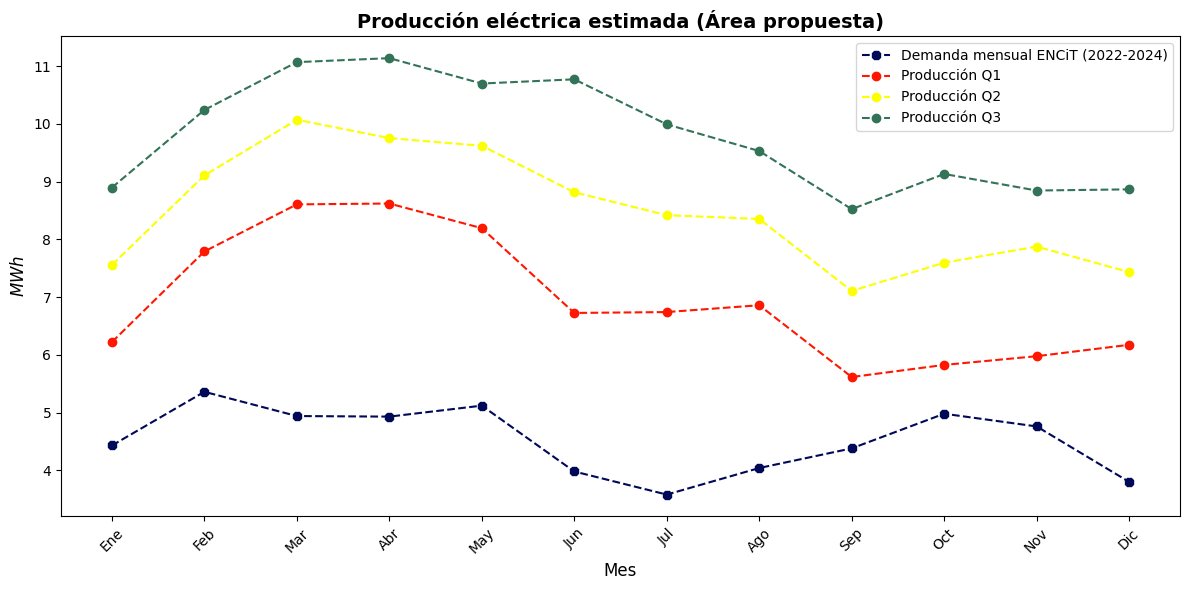

In [22]:
#Generar una variable que contenga los meses del año para su uso en el eje "X" de la gráfica. 
mes2= ["Ene","Feb","Mar","Abr","May","Jun","Jul","Ago","Sep","Oct","Nov","Dic"]

#Crear la figura. 
fig, ax = plt.subplots(figsize=(12, 6))

#Representar la demanda eléctrica mediante una línea. 
ax.plot(mes2, consfin, marker="8", linestyle='--', color='#000957', label='Demanda mensual ENCiT (2022-2024)')

# Representar la producción eléctrica proyectada mediante líneas. 
ax.plot(mes2, Q1, color='#FF1700', marker="o", linestyle='--', label="Producción Q1")
ax.plot(mes2, Q2, color='#FBFF00', marker='o', linestyle='--', label="Producción Q2")
ax.plot(mes2, Q3, color='#337357', marker="o", linestyle='--', label="Producción Q3")

#Configurar la vista del gráfico.
ax.set_title("Producción eléctrica estimada (Área propuesta)", fontsize=14, fontweight="bold")
ax.set_xlabel("Mes", fontsize=12)
ax.set_ylabel(r'$MWh$', fontsize=12)
ax.set_xticks(mes2)
ax.tick_params(axis='x', rotation=45)
ax.legend(loc='upper right')
plt.tight_layout()

#plt.savefig("ProduccionElect_AreaImagin.svg", format="svg",dpi=300, bbox_inches='tight')
plt.show()